## Triangular Lattice
This is a test for the simulation code written. We use a directed triangular lattice, as in https://arxiv.org/pdf/1510.00423, and verify that the resulting magnetism is similar to the results as in the paper

In [1]:
# imports
import sys
import os

# For imports
sys.path.append(os.path.abspath(".."))

from ising_magnetic import ising
from ising_graph import IsingGraph
from ising_node import IsingNode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Directed triangular lattice
L = 500
T_list = np.linspace(.1, 2.5, 20)

graph = IsingGraph(L * L)

edges = []
for i in range(L):
    for j in range(L):
        node = L * i + j
        
        up = (j + 1) < L
        right = (i + 1) < L
        
        if up and right:
            edges.append((node, L * (i + 1) + j + 1))
        if up:
            edges.append((node, L * i + j + 1))
        if right:
            edges.append((node, L * (i + 1) + j))


graph.set_edges(edges, directed=True)

In [3]:
from tqdm import tqdm
M_values = []
num_steps = 20
for T in tqdm(T_list):
    ising(graph, T, num_steps, reset=True) # reach steady state
    M_values.append(ising(graph, T, num_steps))

100%|██████████| 20/20 [24:14<00:00, 72.74s/it]


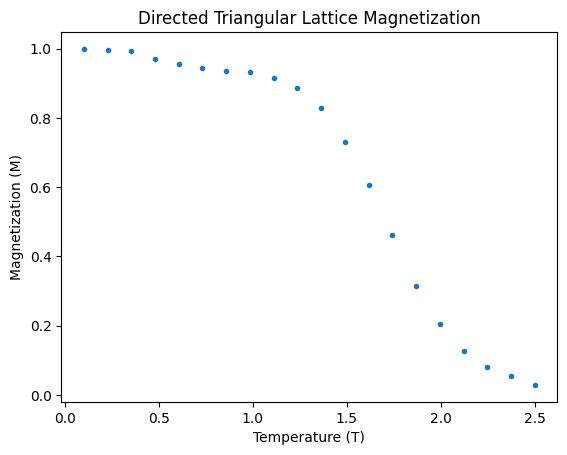

In [4]:
# plot
plt.plot(T_list, M_values, '.')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (M)')
plt.title('Directed Triangular Lattice Magnetization')
plt.show()